In [2]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import applications,activations
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras import optimizers,utils
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization,ZeroPadding2D
from keras.layers import Convolution2D, Activation,MaxPooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import os
from numpy import unique
from sklearn.preprocessing import LabelEncoder
from random import shuffle
import cv2
import imageio
from keras.utils.np_utils import to_categorical
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
# import the module
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from numpy import argmax
from sklearn.metrics import r2_score
import tensorflow as tf
from keras.models import load_model


# classification mlp model for the abalone dataset
from numpy import unique
from numpy import argmax
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import imageio
import os
import seaborn as sns
from PIL import Image
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.models import Model
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.models import Sequential

from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
import math  

from tensorflow.keras.utils import plot_model

In [3]:
# changing dir and loading images in the folder

filepath = "C:\\Users\\CyberOps\\PhD\\balanceddata"
os.chdir(filepath)

onlyfiles = os.listdir()
len(onlyfiles)

11700

11700
24: 450
17: 450
21: 450
12: 450
11: 450
22: 450
6: 450
8: 450
18: 450
28: 450
23: 450
27: 450
14: 450
9: 450
16: 450
7: 450
19: 450
20: 450
13: 450
5: 450
25: 450
15: 450
30: 450
26: 450
10: 450
29: 450


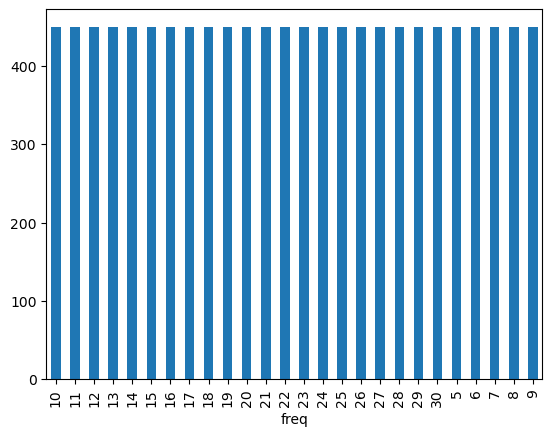

freq
0   24
1   17
2   21
3   12
4   11

In [4]:
shuffle(onlyfiles)
ages = [i.split('_')[0] for i in onlyfiles]
print (len(ages))

elements_count = {}
# iterating over the elements for frequency
for element in ages:
   # checking whether it is in the dict or not
   if element in elements_count:
      # incerementing the count by 1
      elements_count[element] += 1
   else:
      # setting the count to 1
      elements_count[element] = 1
# printing the elements frequencies
for key, value in elements_count.items():
   print(f"{key}: {value}")

import pandas as pd

df = pd.DataFrame({'freq': ages})
df.groupby('freq', as_index=True).size().plot(kind='bar')
plt.show()
df.head()

In [5]:
filepaths = pd.Series(onlyfiles, name='Filepath').astype(str)
ages = pd.Series(ages, name='Age').astype(np.int)

images = pd.concat([filepaths, ages], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

ages=np.array(ages)

C:\Users\CyberOps\AppData\Local\Temp\ipykernel_15308\2305792229.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ages = pd.Series(ages, name='Age').astype(np.int)


In [6]:
type(ages)

numpy.ndarray

In [7]:
len(ages)

11700

In [8]:
ages.shape

(11700,)

Age: 26


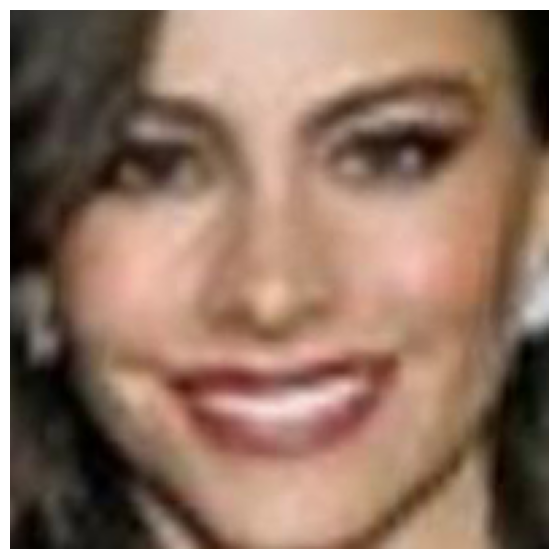

In [9]:
def visualize(image):
    plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.imshow(image)

#choose an image id to see its age
image_id = 1
image_example_path = images.iloc[image_id].Filepath
age = images.iloc[image_id].Age

print(f'Age: {age}')
image = cv2.imread(image_example_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

In [45]:
images.head()

Filepath  Age
0  27_210.jpg   27
1    7_19.jpg    7
2   24_41.jpg   24
3   10_74.jpg   10
4  16_156.jpg   16

In [11]:

classes = []
for i in ages:
      i = int(i)
      if (i>=5) and (i<=12):
         classes.append(0)   
      if (i>=13) and (i<=17):
          classes.append(1)       
      if (i>=18) and (i<=30):
          classes.append(2)
     
     
            
            
            
classes[:3]

print(len(classes))

categorical_labels = to_categorical(classes, num_classes=3)
categorical_labels.shape

11700


(11700, 3)

In [12]:

X_data =[]
for file in onlyfiles:
  if(file !="model.png"):
      cv2.imread( file)
      img=imageio.imread(file,pilmode="RGB")
      img =cv2.resize(img, (224,224))
      X_data.append(img)



X = np.squeeze(X_data)
X.shape


# normalize data
X = X.astype('float32')
X /= 255


C:\Users\CyberOps\AppData\Local\Temp\ipykernel_15308\1951118859.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(file,pilmode="RGB")


In [18]:
X.shape

(11700, 224, 224, 3)

In [19]:

agelabel=ages
y_class = LabelEncoder().fit_transform(agelabel)
n_class = len(unique(y_class))
n_class

26

In [11]:
type(agelabel)

numpy.ndarray

In [15]:
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10

# train is now 75% of the entire data set
x_train, x_test, y_train_reg, y_test_reg, y_train_class, y_test_class  = train_test_split(X, agelabel,categorical_labels, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val_reg, y_test_reg,y_val_class, y_test_class= train_test_split(x_test, y_test_reg, y_test_class,test_size=test_ratio/(test_ratio + validation_ratio)) 

print("Training Image Size", x_train.shape," Validation Image Size", x_val.shape, "Testing Image Size ",x_test.shape)
print("Training Label Size",y_train_reg.shape, "validation Label Size",y_val_reg.shape, "Testing Image Size",y_test_reg.shape)
print("Training Label Size",y_train_class.shape, "validation Label Size",y_val_class.shape, "Testing Image Size",y_test_class.shape)


Training Image Size (8189, 224, 224, 3)  Validation Image Size (2340, 224, 224, 3) Testing Image Size  (1171, 224, 224, 3)
Training Label Size (8189,) validation Label Size (2340,) Testing Image Size (1171,)
Training Label Size (8189, 3) validation Label Size (2340, 3) Testing Image Size (1171, 3)


In [16]:
print (y_test_class.shape)
print (y_test_reg.shape)
print(x_test.shape)


(1171, 3)
(1171,)
(1171, 224, 224, 3)


In [20]:
print (y_train_class.shape)
print (y_train_reg.shape)
print(x_train.shape)


(8189, 3)
(8189,)
(8189, 224, 224, 3)


In [55]:
imagesize =X.shape[1]

In [14]:

inputs = Input(shape = (imagesize, imagesize, 3))

model =Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)
model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)
model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)
model= Flatten()(model)
model = Dense(64)(model)
model = Activation("relu")(model)
model  = Dropout(0.30)(model )
model  = BatchNormalization()(model)
model  = Dense(64)(model)
model  = Activation("relu")(model)
model  = BatchNormalization()(model)
model = Dropout(0.30)(model)
model  = Dense(128)(model)
model = Activation("relu")(model)
model  = BatchNormalization()(model)
model  = Dropout(0.20)(model)
model = Dense(128, activation = "relu")(model)
model = Dropout(0.5)(model)
dense = Dense(512, activation = "relu")(model)
reg_cnn = Dense(1, activation = 'linear', name='regression_output')(dense)
cla_cnn = Dense(3, activation = 'softmax', name='classification_output')(dense)
age_net = Model(inputs=inputs, outputs=[reg_cnn, cla_cnn])
age_net.summary()


NameError: name 'imagesize' is not defined

In [21]:
from keras.models import load_model
age_net=load_model('/model/agenet.h5')


from keras.models import load_model
age_net_reg=load_model('/model/agenet_reg.h5')

age_net_class=load_model('/model/agenet_class.h5')

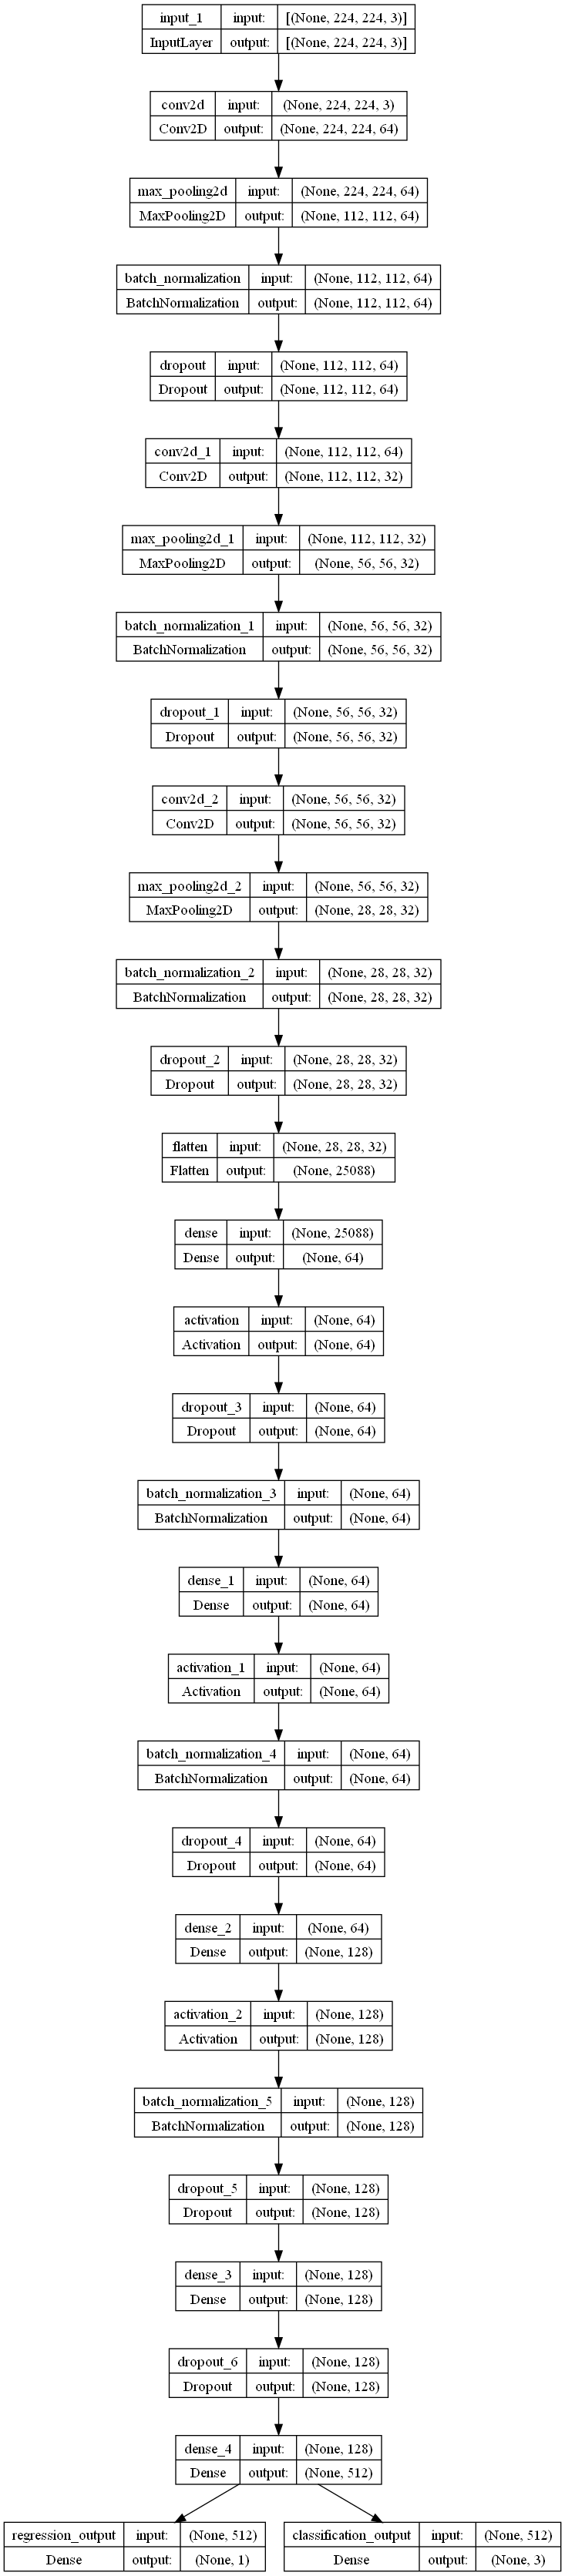

In [23]:
plot_model(age_net, to_file='/model/age_net.png', show_shapes=True)

In [24]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

age_net.compile(loss=['mse','categorical_crossentropy'],
             optimizer=optimizer,
             metrics=['mae','accuracy'])








NameError: name 'age_net' is not defined

In [60]:




n_folds=10



#save the model history in a list after fitting so that we can plot later
model_history = [] 

for i in range(n_folds):
  early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
  model_checkpoint = ModelCheckpoint('/model/agenet.h5', verbose=1, save_best_only=True)

  model_history=age_net.fit(x_train, [y_train_reg,y_train_class],validation_data=(x_val,[y_val_reg,y_val_class]), epochs=50, batch_size=32,verbose=2,callbacks=[early_stopping, model_checkpoint],shuffle=True)
  print("Training on Fold: ",i+1)
  print("======="*12, end="\n\n\n")
  print("======="*12, end="\n\n\n")
  

Epoch 1/50

Epoch 1: val_loss improved from inf to 16.08536, saving model to /model\agenet.h5
256/256 - 331s - loss: 7.3984 - regression_output_loss: 7.0452 - classification_output_loss: 0.3532 - regression_output_mae: 2.0425 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1348 - classification_output_accuracy: 0.8575 - val_loss: 16.0854 - val_regression_output_loss: 15.6433 - val_classification_output_loss: 0.4420 - val_regression_output_mae: 2.5587 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.1649 - val_classification_output_accuracy: 0.8308 - 331s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_loss improved from 16.08536 to 11.27113, saving model to /model\agenet.h5
256/256 - 308s - loss: 7.8666 - regression_output_loss: 7.5093 - classification_output_loss: 0.3574 - regression_output_mae: 2.1135 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1372 - classification_output_accuracy: 0.8520 - val_loss: 11.2711

Epoch 6/50

Epoch 6: val_loss did not improve from 10.74766
256/256 - 298s - loss: 7.6945 - regression_output_loss: 7.3394 - classification_output_loss: 0.3551 - regression_output_mae: 2.0881 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1385 - classification_output_accuracy: 0.8514 - val_loss: 11.1852 - val_regression_output_loss: 10.7657 - val_classification_output_loss: 0.4195 - val_regression_output_mae: 2.3931 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.1699 - val_classification_output_accuracy: 0.8363 - 298s/epoch - 1s/step
Training on Fold:  2




Epoch 1/50

Epoch 1: val_loss improved from inf to 12.85664, saving model to /model\agenet.h5
256/256 - 300s - loss: 7.2178 - regression_output_loss: 6.8721 - classification_output_loss: 0.3457 - regression_output_mae: 2.0150 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1338 - classification_output_accuracy: 0.8597 - val_loss: 12.8566 - val_regress

256/256 - 299s - loss: 7.1525 - regression_output_loss: 6.8080 - classification_output_loss: 0.3445 - regression_output_mae: 1.9924 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1304 - classification_output_accuracy: 0.8579 - val_loss: 10.8250 - val_regression_output_loss: 10.4254 - val_classification_output_loss: 0.3996 - val_regression_output_mae: 2.3475 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.1617 - val_classification_output_accuracy: 0.8466 - 299s/epoch - 1s/step
Epoch 14/50

Epoch 14: val_loss did not improve from 9.90312
256/256 - 297s - loss: 6.8934 - regression_output_loss: 6.5544 - classification_output_loss: 0.3389 - regression_output_mae: 1.9555 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1324 - classification_output_accuracy: 0.8566 - val_loss: 11.7872 - val_regression_output_loss: 11.3499 - val_classification_output_loss: 0.4373 - val_regression_output_mae: 2.4766 - val_regression


Epoch 11: val_loss did not improve from 10.46582
256/256 - 297s - loss: 6.5119 - regression_output_loss: 6.1944 - classification_output_loss: 0.3174 - regression_output_mae: 1.9246 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1236 - classification_output_accuracy: 0.8654 - val_loss: 10.7461 - val_regression_output_loss: 10.3479 - val_classification_output_loss: 0.3982 - val_regression_output_mae: 2.2958 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.1588 - val_classification_output_accuracy: 0.8607 - 297s/epoch - 1s/step
Epoch 12/50

Epoch 12: val_loss did not improve from 10.46582
256/256 - 297s - loss: 6.4875 - regression_output_loss: 6.1641 - classification_output_loss: 0.3234 - regression_output_mae: 1.8968 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1251 - classification_output_accuracy: 0.8654 - val_loss: 10.8596 - val_regression_output_loss: 10.4590 - val_classification_output_loss: 0.4005 -

256/256 - 295s - loss: 6.6717 - regression_output_loss: 6.3508 - classification_output_loss: 0.3209 - regression_output_mae: 1.9211 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1254 - classification_output_accuracy: 0.8670 - val_loss: 10.1437 - val_regression_output_loss: 9.7605 - val_classification_output_loss: 0.3832 - val_regression_output_mae: 2.2754 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.1466 - val_classification_output_accuracy: 0.8573 - 295s/epoch - 1s/step
Epoch 6/50

Epoch 6: val_loss did not improve from 10.14367
256/256 - 295s - loss: 6.4732 - regression_output_loss: 6.1498 - classification_output_loss: 0.3233 - regression_output_mae: 1.8941 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1245 - classification_output_accuracy: 0.8687 - val_loss: 11.0949 - val_regression_output_loss: 10.6898 - val_classification_output_loss: 0.4051 - val_regression_output_mae: 2.3747 - val_regression_o

Training on Fold:  6




Epoch 1/50

Epoch 1: val_loss improved from inf to 10.85250, saving model to /model\agenet.h5
256/256 - 298s - loss: 6.3916 - regression_output_loss: 6.0760 - classification_output_loss: 0.3156 - regression_output_mae: 1.8824 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1215 - classification_output_accuracy: 0.8703 - val_loss: 10.8525 - val_regression_output_loss: 10.4601 - val_classification_output_loss: 0.3924 - val_regression_output_mae: 2.2951 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.1520 - val_classification_output_accuracy: 0.8568 - 298s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_loss did not improve from 10.85250
256/256 - 296s - loss: 6.1439 - regression_output_loss: 5.8257 - classification_output_loss: 0.3182 - regression_output_mae: 1.8356 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1238 - classification_output_accuracy: 0.8708 - val_loss: 11.4260 - val_regress

Epoch 6/50

Epoch 6: val_loss improved from 10.58591 to 9.95160, saving model to /model\agenet.h5
256/256 - 297s - loss: 5.7818 - regression_output_loss: 5.4839 - classification_output_loss: 0.2979 - regression_output_mae: 1.7890 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1167 - classification_output_accuracy: 0.8778 - val_loss: 9.9516 - val_regression_output_loss: 9.5732 - val_classification_output_loss: 0.3784 - val_regression_output_mae: 2.1699 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.1454 - val_classification_output_accuracy: 0.8658 - 297s/epoch - 1s/step
Epoch 7/50

Epoch 7: val_loss did not improve from 9.95160
256/256 - 299s - loss: 5.6658 - regression_output_loss: 5.3776 - classification_output_loss: 0.2883 - regression_output_mae: 1.7664 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1117 - classification_output_accuracy: 0.8836 - val_loss: 11.2016 - val_regression_output_loss: 10.7816

Epoch 9/50

Epoch 9: val_loss improved from 9.56493 to 9.35520, saving model to /model\agenet.h5
256/256 - 295s - loss: 5.5504 - regression_output_loss: 5.2517 - classification_output_loss: 0.2987 - regression_output_mae: 1.7577 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1153 - classification_output_accuracy: 0.8758 - val_loss: 9.3552 - val_regression_output_loss: 8.9752 - val_classification_output_loss: 0.3800 - val_regression_output_mae: 2.1051 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.1431 - val_classification_output_accuracy: 0.8628 - 295s/epoch - 1s/step
Epoch 10/50

Epoch 10: val_loss did not improve from 9.35520
256/256 - 296s - loss: 5.7488 - regression_output_loss: 5.4453 - classification_output_loss: 0.3035 - regression_output_mae: 1.7615 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1172 - classification_output_accuracy: 0.8764 - val_loss: 10.6376 - val_regression_output_loss: 10.253

Training on Fold:  10






37/37 [==============================] - 11s 242ms/step
The MSE 9.354304669083058
The MAE 2.10356205941061
this is the rmse 3.0584807779489243
Test R^2 Score: 0.83416
[[328  34   6]
 [ 22 129  50]
 [  2  35 565]]
(1171, 3)


<AxesSubplot:>

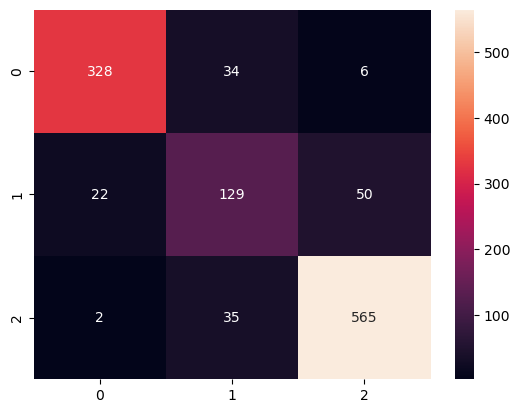

In [61]:
yhat1, yhat2 = age_net.predict(x_test)
true_ages=y_test_reg

from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,yhat1)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(true_ages ,yhat1)
print ("The MAE",mae)



rmse = np.sqrt(mse)

print ("this is the rmse",rmse )

rmse = np.sqrt(age_net.evaluate(x_test, verbose=0))

r2 = r2_score(true_ages, yhat1)
print("Test R^2 Score: {:.5f}".format(r2))




y_pred=np.argmax(yhat2, axis=1)
y_test=np.argmax(y_test_class, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(yhat2.shape)

import seaborn as sns
sns.heatmap(cm, fmt="d", annot=True)


In [28]:
yhat2.shape

(1171, 3)

In [62]:
from sklearn.metrics import classification_report

predicted_classes = np.argmax(yhat2, axis=1)
true_classes = np.argmax(y_test_class, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       368
           1       0.65      0.64      0.65       201
           2       0.91      0.94      0.92       602

    accuracy                           0.87      1171
   macro avg       0.83      0.82      0.83      1171
weighted avg       0.87      0.87      0.87      1171



In [63]:

xscore = age_net.evaluate(x_test, y_test_class, verbose = 0) 

print('Test loss:', xscore[5]) 
print('Test accuracy:', xscore[6])
print (len(xscore))

Test loss: 0.12957577407360077
Test accuracy: 0.8727583289146423
7


In [17]:
agenet.save('../model/utk_combined-cnn-regression-20.h5', include_optimizer=True)


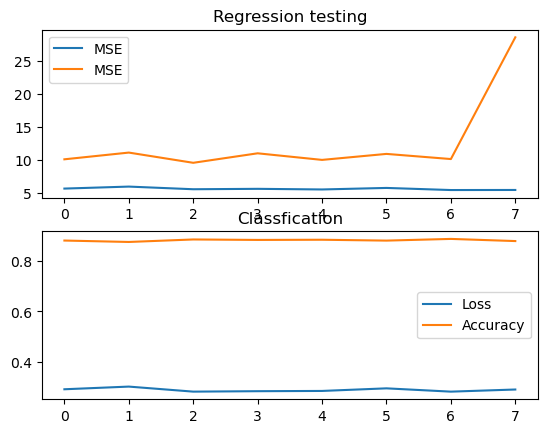

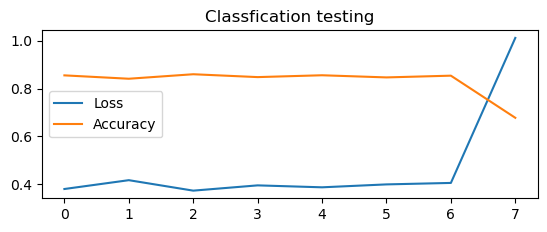

In [64]:
# plot loss during training
plt.subplot(211)
plt.title('Regression')
plt.plot(model_history.history['loss'], label='MSE')
#plt.plot(model_history.history[' regression_output_mae'], label='MAE')
plt.legend()


# plot loss during training
plt.subplot(211)
plt.title('Regression testing')
plt.plot(model_history.history['val_loss'], label='MSE')
#plt.plot(model_history.history['val_regression_output_mae'], label='MAE')
plt.legend()

# plot accuracy during training
plt.subplot(212)
plt.title('Classfication')
plt.plot(model_history.history['classification_output_loss'], label='Loss')
plt.plot(model_history.history['classification_output_accuracy'], label='Accuracy')
plt.legend()
plt.show()

# plot accuracy testing 
plt.subplot(212)
plt.title('Classfication testing')
plt.plot(model_history.history['val_classification_output_loss'], label='Loss')
plt.plot(model_history.history['val_classification_output_accuracy'], label='Accuracy')
plt.legend()
plt.show()





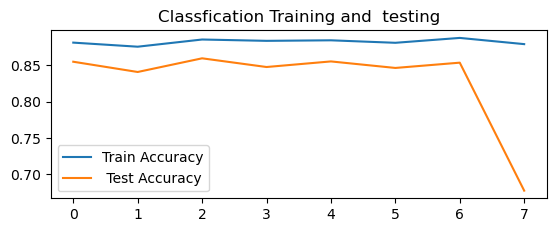

In [65]:

# plot accuracy testing 
plt.subplot(212)
plt.title('Classfication Training and  testing')
plt.plot(model_history.history['classification_output_accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_classification_output_accuracy'], label=' Test Accuracy')
plt.legend()
plt.show()


In [ ]:
agenet= load_model()

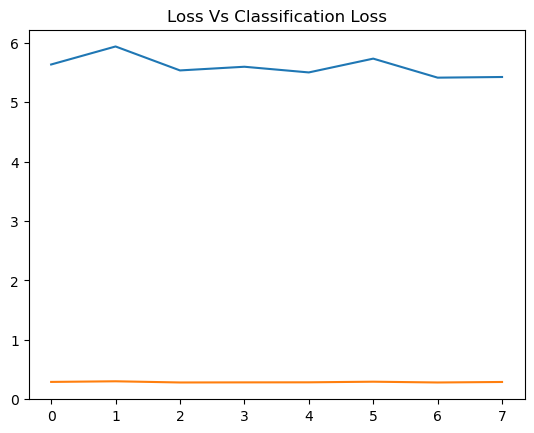

In [66]:
plt.title('Loss Vs Classification Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['classification_output_loss'], label='test')

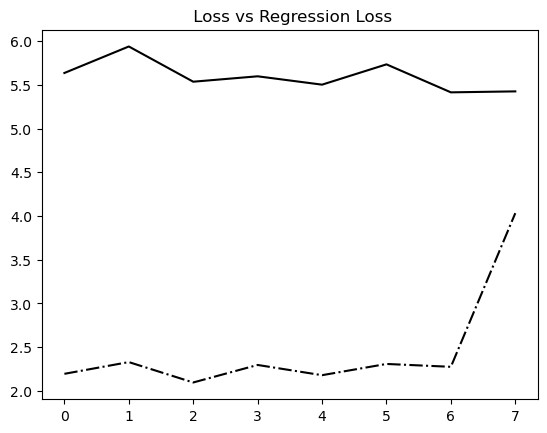

In [67]:
plt.title(' Loss vs Regression Loss')
plt.plot(model_history.history['loss'], label='Train Loss Fold 1', color='black')
plt.plot(model_history.history['val_regression_output_mae'], label='Val Loss Fold 1', color='black', linestyle = "dashdot")

In [40]:
inputs = Input(shape = (imagesize, imagesize, 3))

model =Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)

model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)

model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)


model= Flatten()(model)

model = Dense(64)(model)
model = Activation("relu")(model)
model  = Dropout(0.30)(model )
model  = BatchNormalization()(model)

model  = Dense(64)(model)
model  = Activation("relu")(model)
model  = BatchNormalization()(model)
model = Dropout(0.30)(model)


model  = Dense(128)(model)
model = Activation("relu")(model)
model  = BatchNormalization()(model)
model  = Dropout(0.20)(model)



model = Dense(128, activation = "relu")(model)
model = Dropout(0.5)(model)
dense = Dense(512, activation = "relu")(model)


reg_cnn = Dense(1, activation = 'linear', name='regression_output')(dense)



age_net_reg = Model(inputs=inputs, outputs=reg_cnn)



age_net_reg.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 112, 112, 64)     256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 112, 112, 64)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      8224

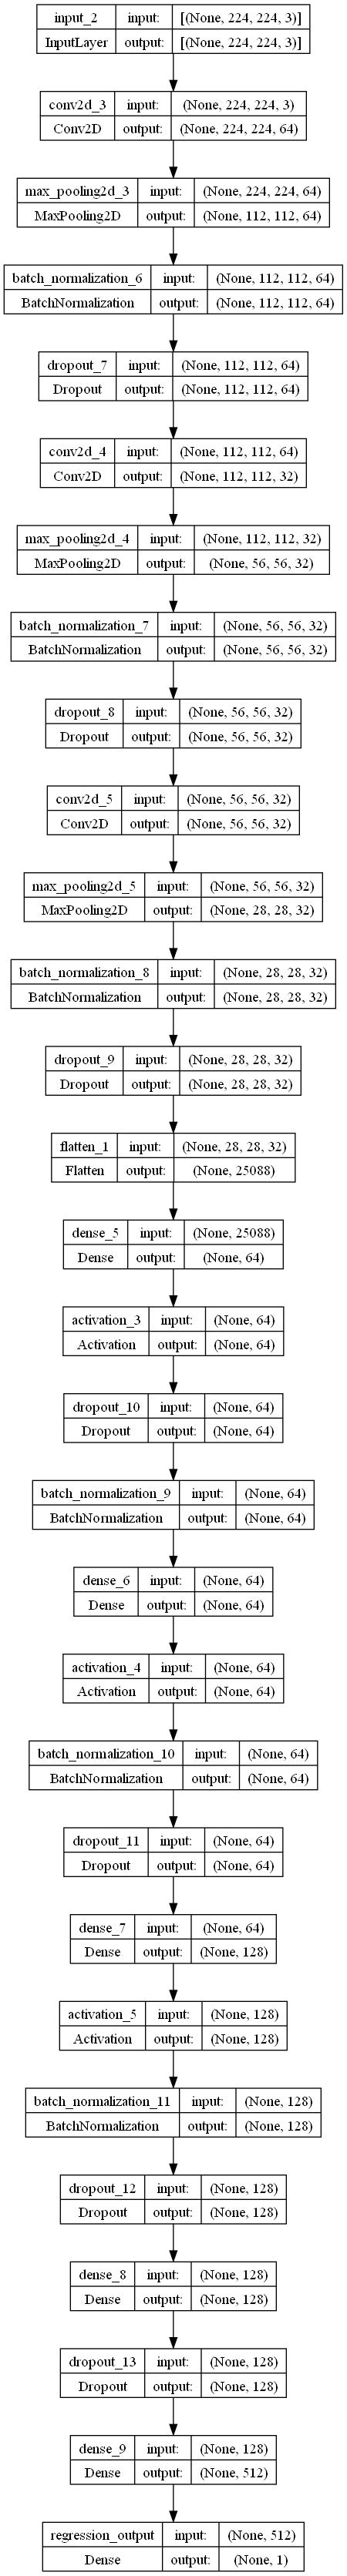

In [41]:
plot_model(age_net_reg, to_file='/model/age_net_reg.png', show_shapes=True)

In [73]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

age_net_reg.compile(loss='mse',
             optimizer=optimizer,
             metrics='mae')







In [68]:



n_folds=10



#save the model history in a list after fitting so that we can plot leter
model_history = [] 

for i in range(n_folds):
  early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5 ,restore_best_weights=True)
  model_history=age_net_reg.fit(x_train, y_train_reg, epochs=50, batch_size=32, verbose=2,callbacks=[early_stopping],validation_data=(x_val,y_val_reg),shuffle=True)
  print("Training on Fold: ",i+1)
  print("======="*12, end="\n\n\n")
  print("======="*12, end="\n\n\n")

Epoch 1/50
256/256 - 299s - loss: 6.6176 - mae: 1.9842 - val_loss: 11.4270 - val_mae: 2.5259 - 299s/epoch - 1s/step
Epoch 2/50
256/256 - 299s - loss: 6.4862 - mae: 1.9664 - val_loss: 10.6537 - val_mae: 2.4432 - 299s/epoch - 1s/step
Epoch 3/50
256/256 - 295s - loss: 6.6829 - mae: 1.9981 - val_loss: 12.1937 - val_mae: 2.6358 - 295s/epoch - 1s/step
Epoch 4/50
256/256 - 299s - loss: 6.5198 - mae: 1.9605 - val_loss: 11.9685 - val_mae: 2.6057 - 299s/epoch - 1s/step
Epoch 5/50
256/256 - 298s - loss: 6.3854 - mae: 1.9496 - val_loss: 11.7594 - val_mae: 2.5750 - 298s/epoch - 1s/step
Epoch 6/50
256/256 - 297s - loss: 6.7061 - mae: 1.9852 - val_loss: 26.0208 - val_mae: 3.9938 - 297s/epoch - 1s/step
Epoch 7/50
256/256 - 295s - loss: 6.7312 - mae: 1.9995 - val_loss: 10.5635 - val_mae: 2.4295 - 295s/epoch - 1s/step
Epoch 8/50
256/256 - 297s - loss: 6.0977 - mae: 1.8965 - val_loss: 10.7382 - val_mae: 2.4143 - 297s/epoch - 1s/step
Epoch 9/50
256/256 - 296s - loss: 6.3043 - mae: 1.9259 - val_loss: 11.28

256/256 - 297s - loss: 6.3678 - mae: 1.9113 - val_loss: 17.5991 - val_mae: 3.1621 - 297s/epoch - 1s/step
Epoch 2/50
256/256 - 295s - loss: 6.5320 - mae: 1.9507 - val_loss: 11.6210 - val_mae: 2.5172 - 295s/epoch - 1s/step
Epoch 3/50
256/256 - 296s - loss: 5.6499 - mae: 1.8179 - val_loss: 9.8866 - val_mae: 2.2829 - 296s/epoch - 1s/step
Epoch 4/50
256/256 - 300s - loss: 5.4122 - mae: 1.7808 - val_loss: 10.1791 - val_mae: 2.3288 - 300s/epoch - 1s/step
Epoch 5/50
256/256 - 295s - loss: 5.5266 - mae: 1.7915 - val_loss: 10.0384 - val_mae: 2.3134 - 295s/epoch - 1s/step
Epoch 6/50
256/256 - 301s - loss: 5.2101 - mae: 1.7718 - val_loss: 9.9484 - val_mae: 2.2926 - 301s/epoch - 1s/step
Epoch 7/50
256/256 - 297s - loss: 5.1663 - mae: 1.7353 - val_loss: 9.6192 - val_mae: 2.2192 - 297s/epoch - 1s/step
Epoch 8/50
256/256 - 295s - loss: 5.2887 - mae: 1.7490 - val_loss: 12.3409 - val_mae: 2.6051 - 295s/epoch - 1s/step
Epoch 9/50
256/256 - 296s - loss: 5.3646 - mae: 1.7740 - val_loss: 11.0344 - val_mae: 

In [69]:
yhat = age_net_reg.predict(x_test)
true_ages=y_test_reg

from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,yhat)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(true_ages ,yhat)
print ("The MAE",mae)



rmse = np.sqrt(mse)

print ("this is the rmse",rmse )

rmse = np.sqrt(age_net_reg.evaluate(x_test, verbose=0))

r2 = r2_score(true_ages, yhat)
print("Test R^2 Score: {:.5f}".format(r2))


yhat.shape

37/37 [==============================] - 10s 224ms/step
The MSE 9.540813415038633
The MAE 2.0693599813316337
this is the rmse 3.088820715910626
Test R^2 Score: 0.83085


(1171, 1)

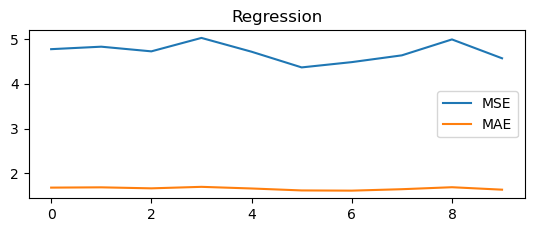

In [70]:
# plot loss during training
plt.subplot(211)
plt.title('Regression')
plt.plot(model_history.history['loss'], label='MSE')
plt.plot(model_history.history['mae'], label='MAE')
plt.legend()
# plot accuracy during training

In [25]:
age_net_reg.save('../model/utk-cnn-regression-20.h5', include_optimizer=True)


In [46]:
from keras.optimizers import SGD 

opt = SGD(lr=0.01) 

C:\Users\CyberOps\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [47]:
inputs = Input(shape = (imagesize, imagesize, 3))

model =Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)

model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)

model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)


model= Flatten()(model)

model = Dense(64)(model)
model = Activation("relu")(model)
model  = Dropout(0.30)(model )
model  = BatchNormalization()(model)

model  = Dense(64)(model)
model  = Activation("relu")(model)
model  = BatchNormalization()(model)
model = Dropout(0.30)(model)


model  = Dense(128)(model)
model = Activation("relu")(model)
model  = BatchNormalization()(model)
model  = Dropout(0.20)(model)



model = Dense(128, activation = "relu")(model)
model = Dropout(0.5)(model)
dense = Dense(512, activation = "relu")(model)


class_cnn = Dense(3, activation = 'softmax', name='classification_output')(dense)



age_net_class = Model(inputs=inputs, outputs=class_cnn)



age_net_class.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_12 (Bat  (None, 112, 112, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_14 (Dropout)        (None, 112, 112, 64)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      8224

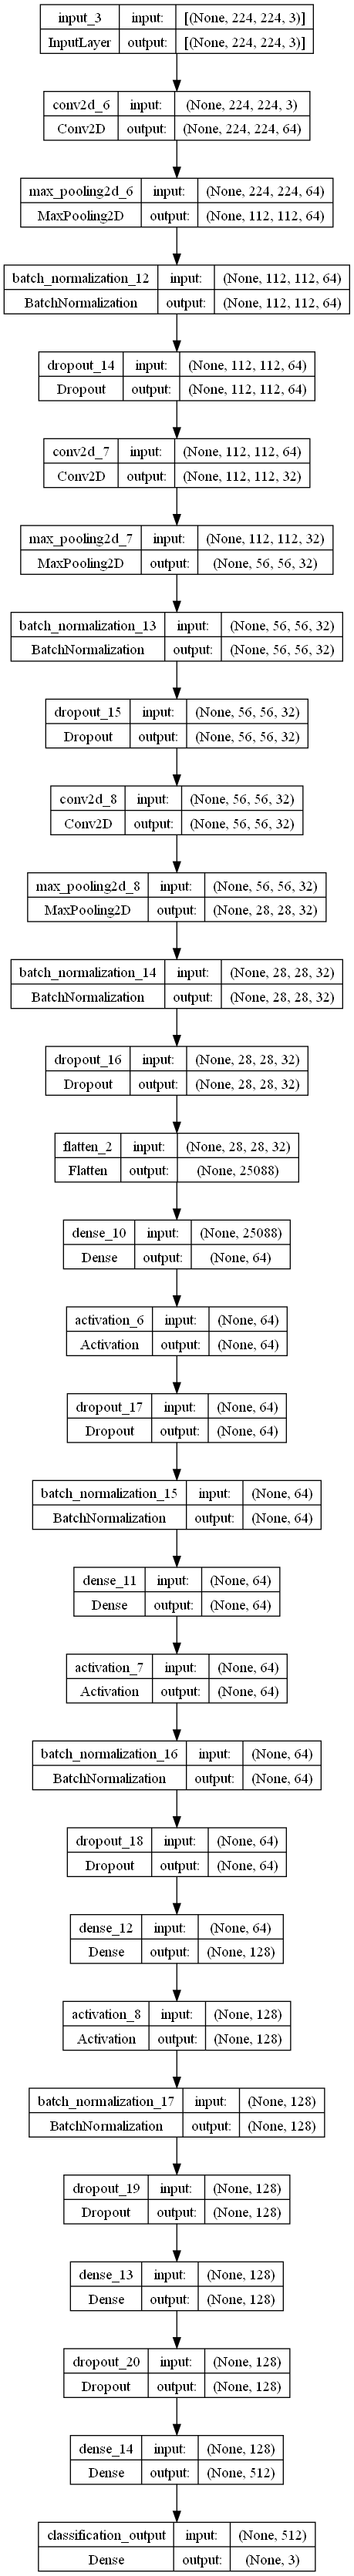

In [48]:
plot_model(age_net_class, to_file='/model/age_net_class.png', show_shapes=True)

In [107]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

age_net_class.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=["accuracy"])







Epoch 1/10
256/256 - 408s - loss: 0.4104 - accuracy: 0.8448 - val_loss: 0.5833 - val_accuracy: 0.7536 - 408s/epoch - 2s/step
Epoch 2/10
256/256 - 550s - loss: 0.3880 - accuracy: 0.8537 - val_loss: 0.3868 - val_accuracy: 0.8607 - 550s/epoch - 2s/step
Epoch 3/10
256/256 - 534s - loss: 0.3556 - accuracy: 0.8657 - val_loss: 0.5639 - val_accuracy: 0.7752 - 534s/epoch - 2s/step
Epoch 4/10
256/256 - 572s - loss: 0.3826 - accuracy: 0.8574 - val_loss: 0.4735 - val_accuracy: 0.8285 - 572s/epoch - 2s/step
Training on Fold:  1






In [71]:


n_folds=10



#save the model history in a list after fitting so that we can plot later
model_history = [] 

for i in range(n_folds):
  early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
  model_history=age_net_class.fit(x_train, y_train_class, epochs=50, batch_size=32, verbose=2,callbacks=[early_stopping],validation_data=(x_val,y_val_class),shuffle=True)
  print("Training on Fold: ",i+1)
  print("======="*12, end="\n\n\n")
  print("======="*12, end="\n\n\n")

Epoch 1/50
256/256 - 298s - loss: 0.0787 - accuracy: 0.9596 - val_loss: 0.1814 - val_accuracy: 0.8949 - 298s/epoch - 1s/step
Epoch 2/50
256/256 - 298s - loss: 0.0893 - accuracy: 0.9545 - val_loss: 0.1870 - val_accuracy: 0.9009 - 298s/epoch - 1s/step
Epoch 3/50
256/256 - 298s - loss: 0.0825 - accuracy: 0.9577 - val_loss: 0.1877 - val_accuracy: 0.8966 - 298s/epoch - 1s/step
Epoch 4/50
256/256 - 304s - loss: 0.0823 - accuracy: 0.9579 - val_loss: 0.1872 - val_accuracy: 0.8923 - 304s/epoch - 1s/step
Epoch 5/50
256/256 - 298s - loss: 0.0805 - accuracy: 0.9602 - val_loss: 0.1917 - val_accuracy: 0.8893 - 298s/epoch - 1s/step
Epoch 6/50
256/256 - 299s - loss: 0.0804 - accuracy: 0.9580 - val_loss: 0.1864 - val_accuracy: 0.8979 - 299s/epoch - 1s/step
Training on Fold:  1




Epoch 1/50
256/256 - 297s - loss: 0.0883 - accuracy: 0.9513 - val_loss: 0.2049 - val_accuracy: 0.8902 - 297s/epoch - 1s/step
Epoch 2/50
256/256 - 298s - loss: 0.0872 - accuracy: 0.9562 - val_loss: 0.2039 - val_accuracy: 0.887

Epoch 3/50
256/256 - 299s - loss: 0.0667 - accuracy: 0.9652 - val_loss: 0.2222 - val_accuracy: 0.8791 - 299s/epoch - 1s/step
Epoch 4/50
256/256 - 300s - loss: 0.0707 - accuracy: 0.9610 - val_loss: 0.1905 - val_accuracy: 0.9038 - 300s/epoch - 1s/step
Epoch 5/50
256/256 - 305s - loss: 0.0668 - accuracy: 0.9641 - val_loss: 0.1722 - val_accuracy: 0.9111 - 305s/epoch - 1s/step
Epoch 6/50
256/256 - 302s - loss: 0.0632 - accuracy: 0.9673 - val_loss: 0.1761 - val_accuracy: 0.9098 - 302s/epoch - 1s/step
Epoch 7/50
256/256 - 298s - loss: 0.0564 - accuracy: 0.9719 - val_loss: 0.1828 - val_accuracy: 0.9017 - 298s/epoch - 1s/step
Epoch 8/50
256/256 - 300s - loss: 0.0581 - accuracy: 0.9696 - val_loss: 0.2027 - val_accuracy: 0.8893 - 300s/epoch - 1s/step
Epoch 9/50
256/256 - 298s - loss: 0.0565 - accuracy: 0.9696 - val_loss: 0.1771 - val_accuracy: 0.9115 - 298s/epoch - 1s/step
Epoch 10/50
256/256 - 298s - loss: 0.0590 - accuracy: 0.9718 - val_loss: 0.1720 - val_accuracy: 0.9132 - 298s/epoch - 1s/step

In [72]:
# Evaluate the model on test set
xscore = age_net_class.evaluate(x_test, y_test_class, verbose=0)
xscore=round(xscore[1],2)
# Print test accuracy
print(xscore * 100," %")



92.0  %


37/37 [==============================] - 10s 234ms/step
[[339  22   7]
 [ 15 161  25]
 [ 15  13 574]]
(1171, 3)


<AxesSubplot:>

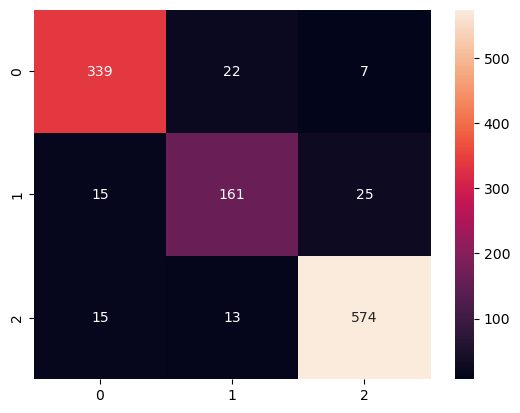

In [74]:



yhat = age_net_class.predict(x_test)
true_ages=y_test_class

y_pred=np.argmax(yhat, axis=1)
y_test=np.argmax(true_ages, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(yhat2.shape)
import seaborn as sns
sns.heatmap(cm, fmt="d", annot=True)






In [75]:
import sklearn

predicted_classes = np.argmax(yhat, axis=1)
true_classes = np.argmax(y_test_class, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       368
           1       0.82      0.80      0.81       201
           2       0.95      0.95      0.95       602

    accuracy                           0.92      1171
   macro avg       0.90      0.89      0.89      1171
weighted avg       0.92      0.92      0.92      1171



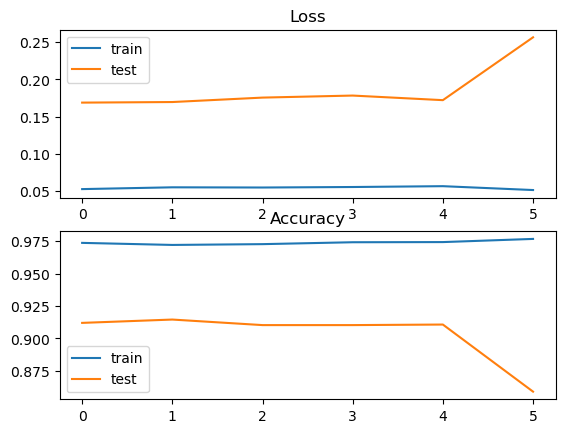

In [76]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(model_history.history['accuracy'], label='train')
plt.plot(model_history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [77]:
labels =["(5-12)",
        "(13-17)" ,# index 0
        "(18-30)"     # index 1
        ]

37/37 [==============================] - 10s 230ms/step


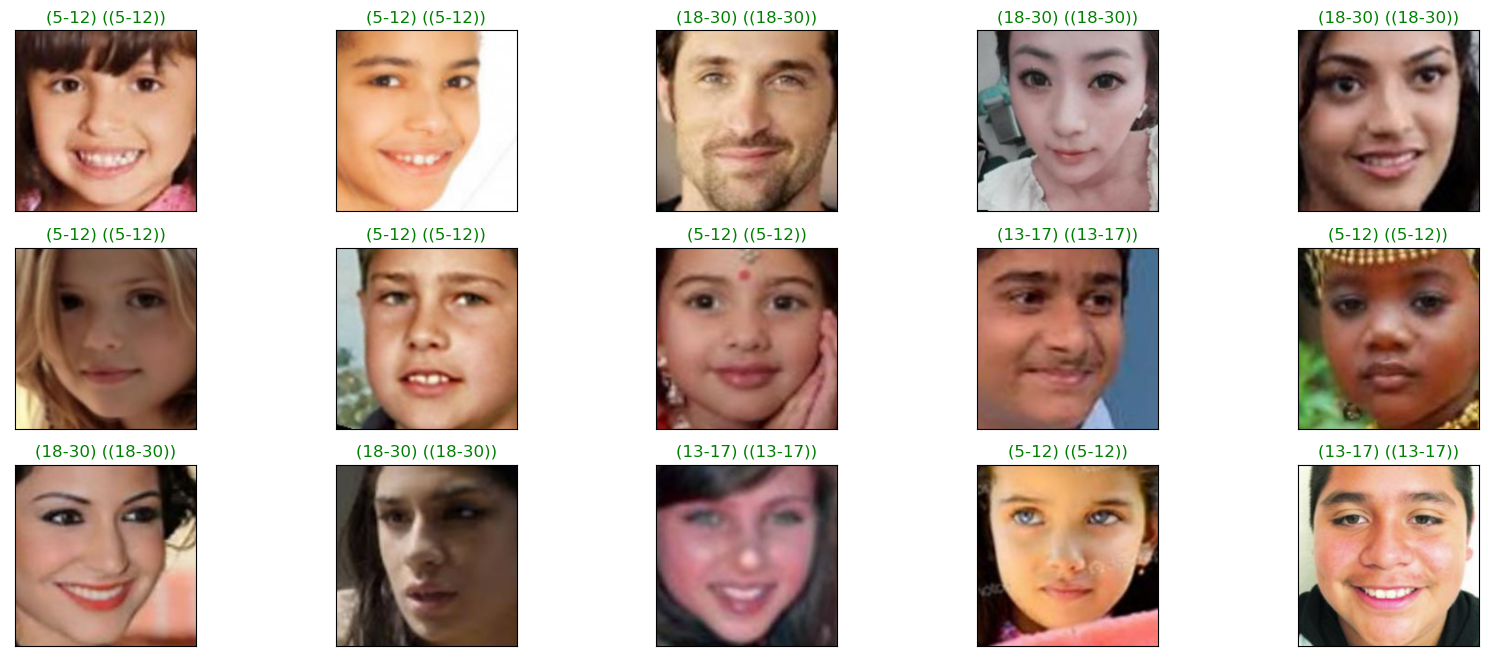

In [78]:
#Combined CNN (PREDICTION AND CLASSIFICATION)

y_hat,yhat_2 = age_net.predict(x_test)


xy= x_test.shape[0]

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(range (x_test.shape[0]), size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(yhat_2[index])
    true_index = np.argmax(y_test_class[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()








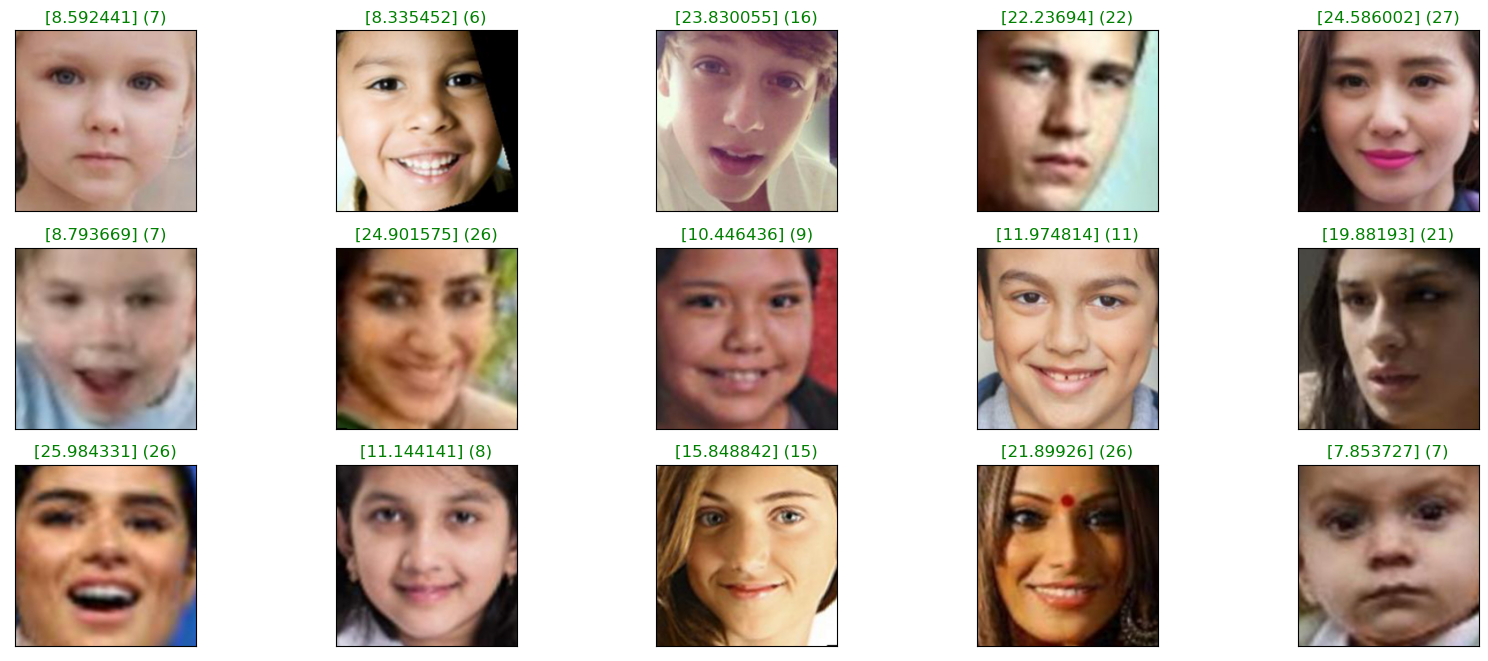

In [79]:
#Combined CNN (PREDICTION AND CLASSIFICATION)
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = y_hat[index]
    true_index = y_test_reg[index]

    ax.set_title("{} ({})".format(predict_index, 
                                  true_index),
                                  color=("green"))                   
plt.show()





In [48]:
ax = figure.add_subplot(3, 5, 1, xticks=[], yticks=[])
    # Display each image
ax.imshow(np.squeeze(x_test[1]))
predict_index = y_hat[1]
true_index = true_ages[1]
ax.set_title("{} ({})".format(predict_index, 
                                  true_index),
                                  color=("green"))                   
plt.show()


37/37 [==============================] - 10s 229ms/step


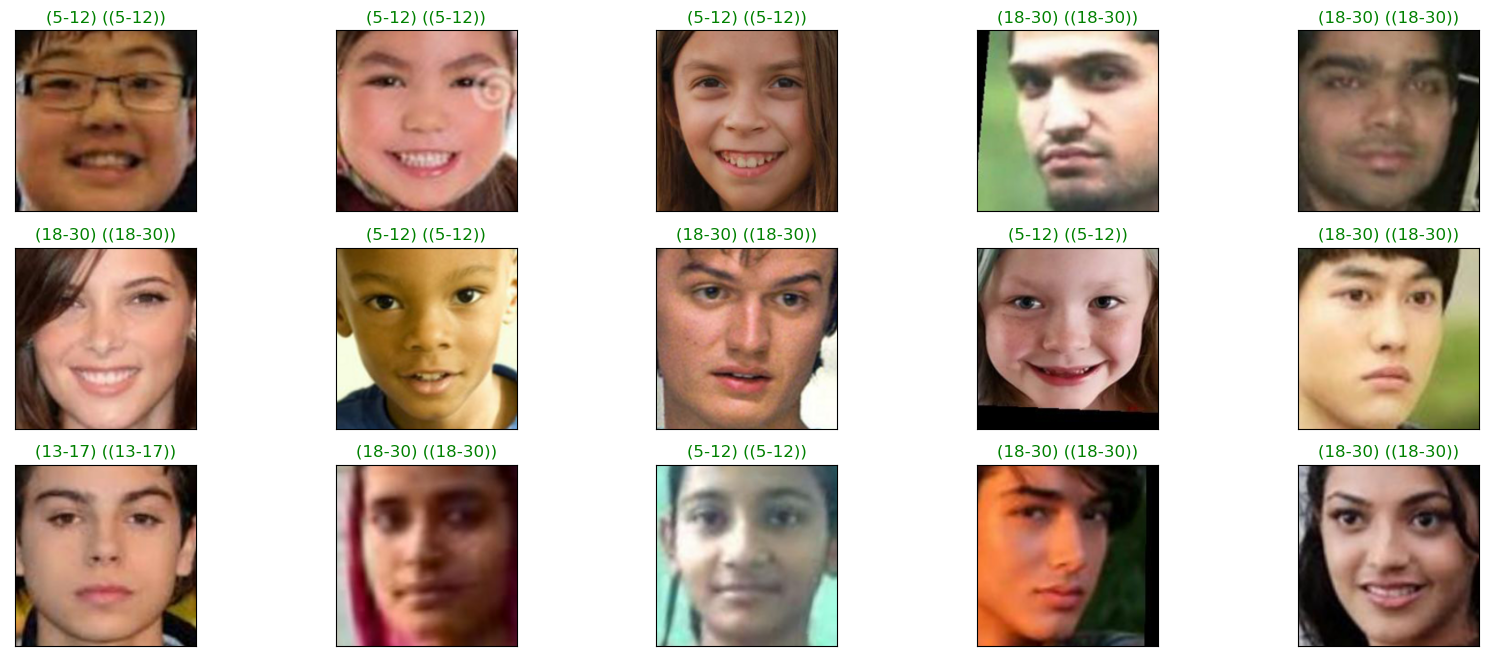

In [80]:


y_hat = age_net_class.predict(x_test)




# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test_class[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [118]:
y_test_reg

df_age = pd.DataFrame(y_test_reg, columns =['Age'])
print(df_age,"\nPandas DataFrame: ")

       Age
7175    17
1537    23
2317    21
6684    20
7311    15
...    ...
3028    19
3917    21
5817    29
10516   25
9063     8

[3510 rows x 1 columns] 
Pandas DataFrame: 


37/37 [==============================] - 10s 200ms/step


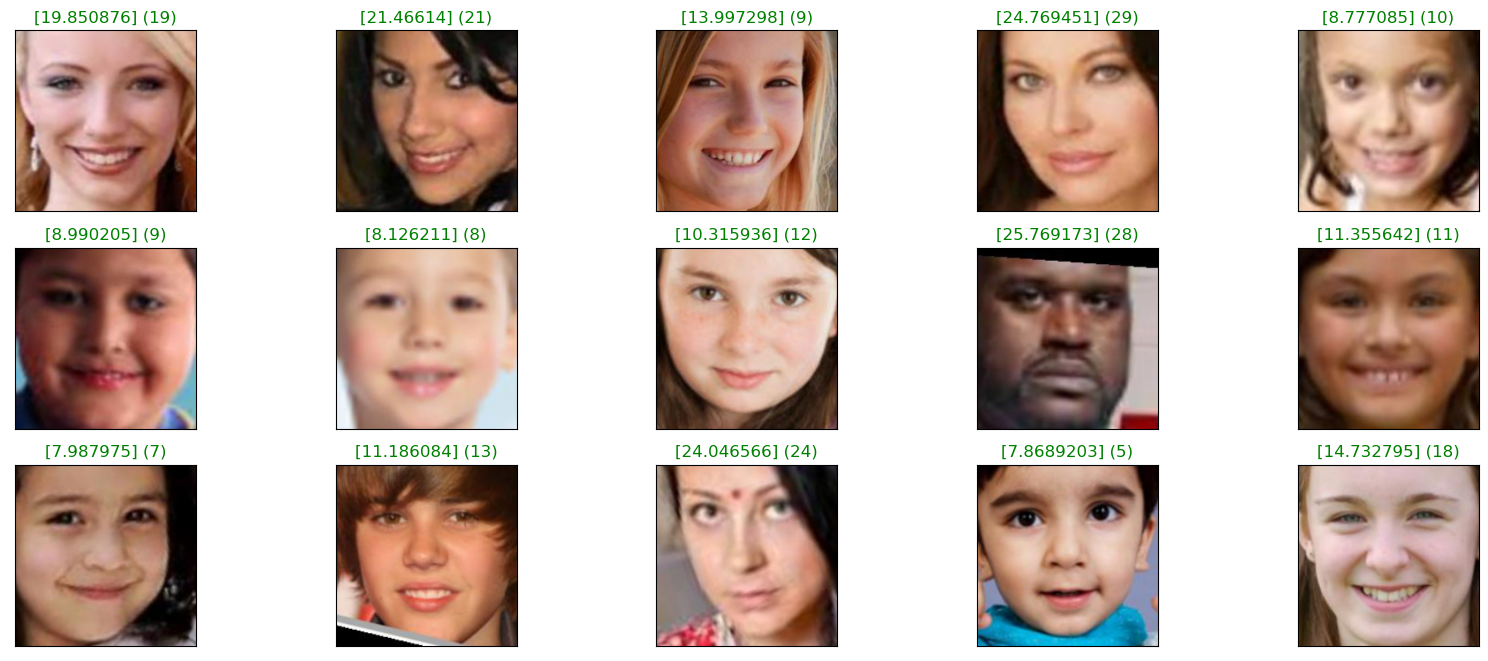

In [89]:
y_hat = age_net_reg.predict(x_test)




# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = y_hat[index]
    true_index = y_test_reg[index]

    ax.set_title("{} ({})".format(predict_index, 
                                  true_index),
                                  color=("green"))                   
plt.show()

In [15]:
from keras.models import load_model
agenet_class=load_model('../model/utk-cnn-class-20.h5',compile=False)
agenet= load_model('../model/utk-cnn-comb-20.h5',compile=False)
agenet_reg = load_model('../model/utk-cnn-reg-20.h5', compile=False) #loading pre-savedd mod

In [86]:
age_net_class.save('/model/utk-cnn-class.h5', include_optimizer=True)

In [87]:
age_net_reg.save('/model/utk-cnn-reg.h5', include_optimizer=True)

In [88]:
age_net.save('/model/utk-cnn-comb.h5', include_optimizer=True)

In [82]:
y_hat =age_net_reg.predict(x_test)
true_ages=y_test_reg

from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,y_hat)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(true_ages ,y_hat)
print ("The MAE",mae)



rmse = np.sqrt(mse)

print ("this is the rmse",rmse )

r2 = r2_score(true_ages, y_hat)
print("Test R^2 Score: {:.5f}".format(r2))


y_hat.shape



37/37 [==============================] - 10s 220ms/step
The MSE 9.540813415038633
The MAE 2.0693599813316337
this is the rmse 3.088820715910626
Test R^2 Score: 0.83085


(1171, 1)

<AxesSubplot:>

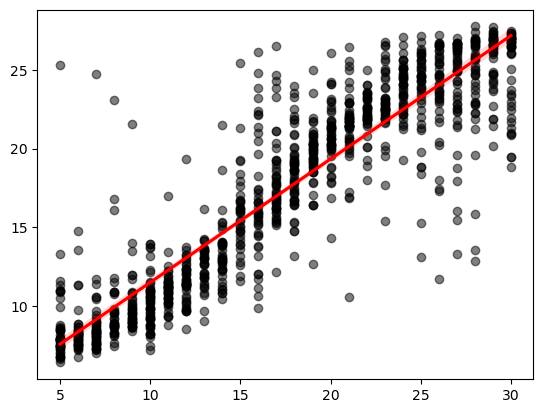

In [83]:

import seaborn as sns

sns.regplot(x = true_ages, y = y_hat,
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 99) # 99% level

In [84]:
prediction,classification = age_net.predict(x_test)
from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,prediction)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(true_ages ,prediction)
print ("The MAE",mae)



rmse = np.sqrt(mse)

print ("this is the rmse",rmse )

r2 = r2_score(true_ages, prediction)
print("Test R^2 Score: {:.5f}".format(r2))


prediction.shape

37/37 [==============================] - 9s 219ms/step
The MSE 9.354304669083058
The MAE 2.10356205941061
this is the rmse 3.0584807779489243
Test R^2 Score: 0.83416


(1171, 1)

<AxesSubplot:>

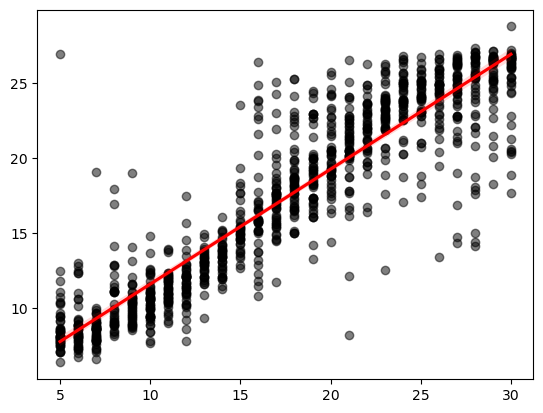

In [85]:
import seaborn as sns

sns.regplot(x = true_ages, y = prediction,
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 99) # 99% level